# Chrnoic Disease Prediction - Using Machine Learning
**Introduction:** Chronic kidney disease (CKD) is a growing global health concern characterized by the gradual decline of kidney function. These vital organs, responsible for filtering waste products and maintaining electrolyte balance in the blood, become progressively less effective in CKD. This leads to a buildup of toxins and imbalances in the body, potentially causing a range of health complications like high blood pressure, fatigue, and swelling. While CKD is currently incurable, early detection and management strategies can significantly slow its progression and improve quality of life. This research paper delves into [mention the specific focus of your research on CKD, e.g., exploring new diagnostic methods, investigating treatment options, or understanding specific risk factors]. Through a deeper understanding of CKD, we can aim to improve patient outcomes and potentially discover new avenues for prevention or even reversal of this progressive disease.

In [319]:
from google.colab import drive
drive.mount('/content/drive')

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Extract the Data-Set ( ckd_Disease.csv )

In [321]:
ckd=pd.read_csv('/content/drive/MyDrive/CKD_Classification/kidney_disease.csv')

In [322]:
ckd.shape

(400, 26)

- It Indicates there are about **400** Rows and **26** Columns are present in our Data Set

In [323]:
ckd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [324]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [325]:
ckd.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [326]:
ckd.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [327]:
ckd['rbc'].fillna('normal',inplace=True)
ckd['pc'].fillna('normal',inplace=True)
ckd['pcc'].fillna('present',inplace=True)
ckd['ba'].fillna('present',inplace=True)
ckd['htn'].fillna('yes',inplace=True)
ckd['dm'].fillna('yes',inplace=True)
ckd['cad'].fillna('yes',inplace=True)
ckd['appet'].fillna('good',inplace=True)
ckd['pe'].fillna('yes',inplace=True)
ckd['ane'].fillna('yes',inplace=True)

In [328]:
ckd.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [329]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [330]:
# features=['pcv','wc','rc']
# for i in features:
#     convert_dtype(ckd,i)

In [331]:
ckd = ckd.copy()  # Avoid modifying the original DataFrame
for col in features:
  ckd[col] = pd.to_numeric(ckd[col], errors='coerce')

In [332]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

In [333]:
for col in ckd.columns:
    # Check for numeric data type (e.g., float or int)
    if pd.api.types.is_numeric_dtype(ckd[col]):
      ckd[col].fillna(ckd[col].mean(), inplace=True)

In [334]:
ckd.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# Performing Exploitory Data Analysis ( EDA )
- Modifying the Column Names as per our requirements

In [335]:
ckd=ckd.drop('id',axis=1)

In [336]:
ckd=ckd.drop('age',axis=1)

In [337]:
ckd.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18.0,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [338]:
ckd.describe().T

,count,mean,std,min,25%,50%,75%,max
bp,400.0,76.469072,13.476298,50.000,70.000,78.234536,80.000000,180.000
sg,400.0,1.017408,0.005369,1.005,1.015,1.017408,1.020000,1.025
al,400.0,1.016949,1.272318,0.000,0.000,1.000000,2.000000,5.000
su,400.0,0.450142,1.029487,0.000,0.000,0.000000,0.450142,5.000
bgr,400.0,148.036517,74.782634,22.000,101.000,126.000000,150.000000,490.000
bu,400.0,57.425722,49.285887,1.500,27.000,44.000000,61.750000,391.000
sc,400.0,3.072454,5.617490,0.400,0.900,1.400000,3.072454,76.000
sod,400.0,137.528754,9.204273,4.500,135.000,137.528754,141.000000,163.000
pot,400.0,4.627244,2.819783,2.500,4.000,4.627244,4.800000,47.000
hemo,400.0,12.526437,2.716171,3.100,10.875,12.526437,14.625000,17.800


In [339]:
def convert_dtype(ckd,feature):
    ckd[feature]=pd.to_numeric(ckd[feature],errors='coerce')

In [340]:
ckd.dtypes

bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [341]:
ckd.isnull().sum()

bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# Performing Data cleaning

In [342]:
def extract_cat_num(ckd):
    cat_col=[col for col in ckd.columns if ckd[col].dtype=='O']
    num_col=[col for col in ckd.columns if ckd[col].dtype!='O']
    return cat_col,num_col

In [343]:
cat_col,num_col=extract_cat_num(ckd)

## Getting the complete information about the dataset

In [344]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp              400 non-null    float64
 1   sg              400 non-null    float64
 2   al              400 non-null    float64
 3   su              400 non-null    float64
 4   rbc             400 non-null    object 
 5   pc              400 non-null    object 
 6   pcc             400 non-null    object 
 7   ba              400 non-null    object 
 8   bgr             400 non-null    float64
 9   bu              400 non-null    float64
 10  sc              400 non-null    float64
 11  sod             400 non-null    float64
 12  pot             400 non-null    float64
 13  hemo            400 non-null    float64
 14  pcv             400 non-null    float64
 15  wc              400 non-null    float64
 16  rc              400 non-null    float64
 17  htn             400 non-null    obj

## Checking the dirtiness in the categorical data.....

In [345]:
for col in cat_col:
    print('{} has {} values'.format(col,ckd[col].unique()))
    print("\n")

rbc has ['normal' 'abnormal'] values


pc has ['normal' 'abnormal'] values


pcc has ['notpresent' 'present'] values


ba has ['notpresent' 'present'] values


htn has ['yes' 'no'] values


dm has ['yes' 'no' ' yes' '\tno' '\tyes'] values


cad has ['no' 'yes' '\tno'] values


appet has ['good' 'poor'] values


pe has ['no' 'yes'] values


ane has ['no' 'yes'] values


classification has ['ckd' 'ckd\t' 'notckd'] values




In [346]:
if 'diabetes mellitus' in ckd.columns:
    ckd['diabetes mellitus'].replace(to_replace={'\tno':0.0,'\tyes':1.0},inplace=True)

if 'coronary artery disease' in ckd.columns:
    ckd['coronary artery disease'].replace(to_replace={'\tno':0.0},inplace=True)

if 'class' in ckd.columns:
    ckd['class'].replace(to_replace={'ckd\t':1.0},inplace=True)

In [347]:
object_dtypes = ckd.select_dtypes(include = 'object')
object_dtypes.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [348]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    },
        "classification":{
        "ckd":1,
        "nockd":0,
        "notckd":0
    }
}

In [349]:
len(cat_col)

11

In [350]:
ckd.replace(dictonary)

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,0,0,0,0,121.000000,36.0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,50.0,1.020,4.0,0.0,0,0,0,0,148.036517,18.0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,80.0,1.010,2.0,3.0,0,0,0,0,423.000000,53.0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,70.0,1.005,4.0,0.0,0,1,1,0,117.000000,56.0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,80.0,1.010,2.0,0.0,0,0,0,0,106.000000,26.0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,0,0,0,0,140.000000,49.0,...,47.0,6700.0,4.900000,0,0,0,1,0,0,0
396,70.0,1.025,0.0,0.0,0,0,0,0,75.000000,31.0,...,54.0,7800.0,6.200000,0,0,0,1,0,0,0
397,80.0,1.020,0.0,0.0,0,0,0,0,100.000000,26.0,...,49.0,6600.0,5.400000,0,0,0,1,0,0,0
398,60.0,1.025,0.0,0.0,0,0,0,0,114.000000,50.0,...,51.0,7200.0,5.900000,0,0,0,1,0,0,0


In [351]:
ckd.tail()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
399,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,...,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


## Analysing distribution of each and every column

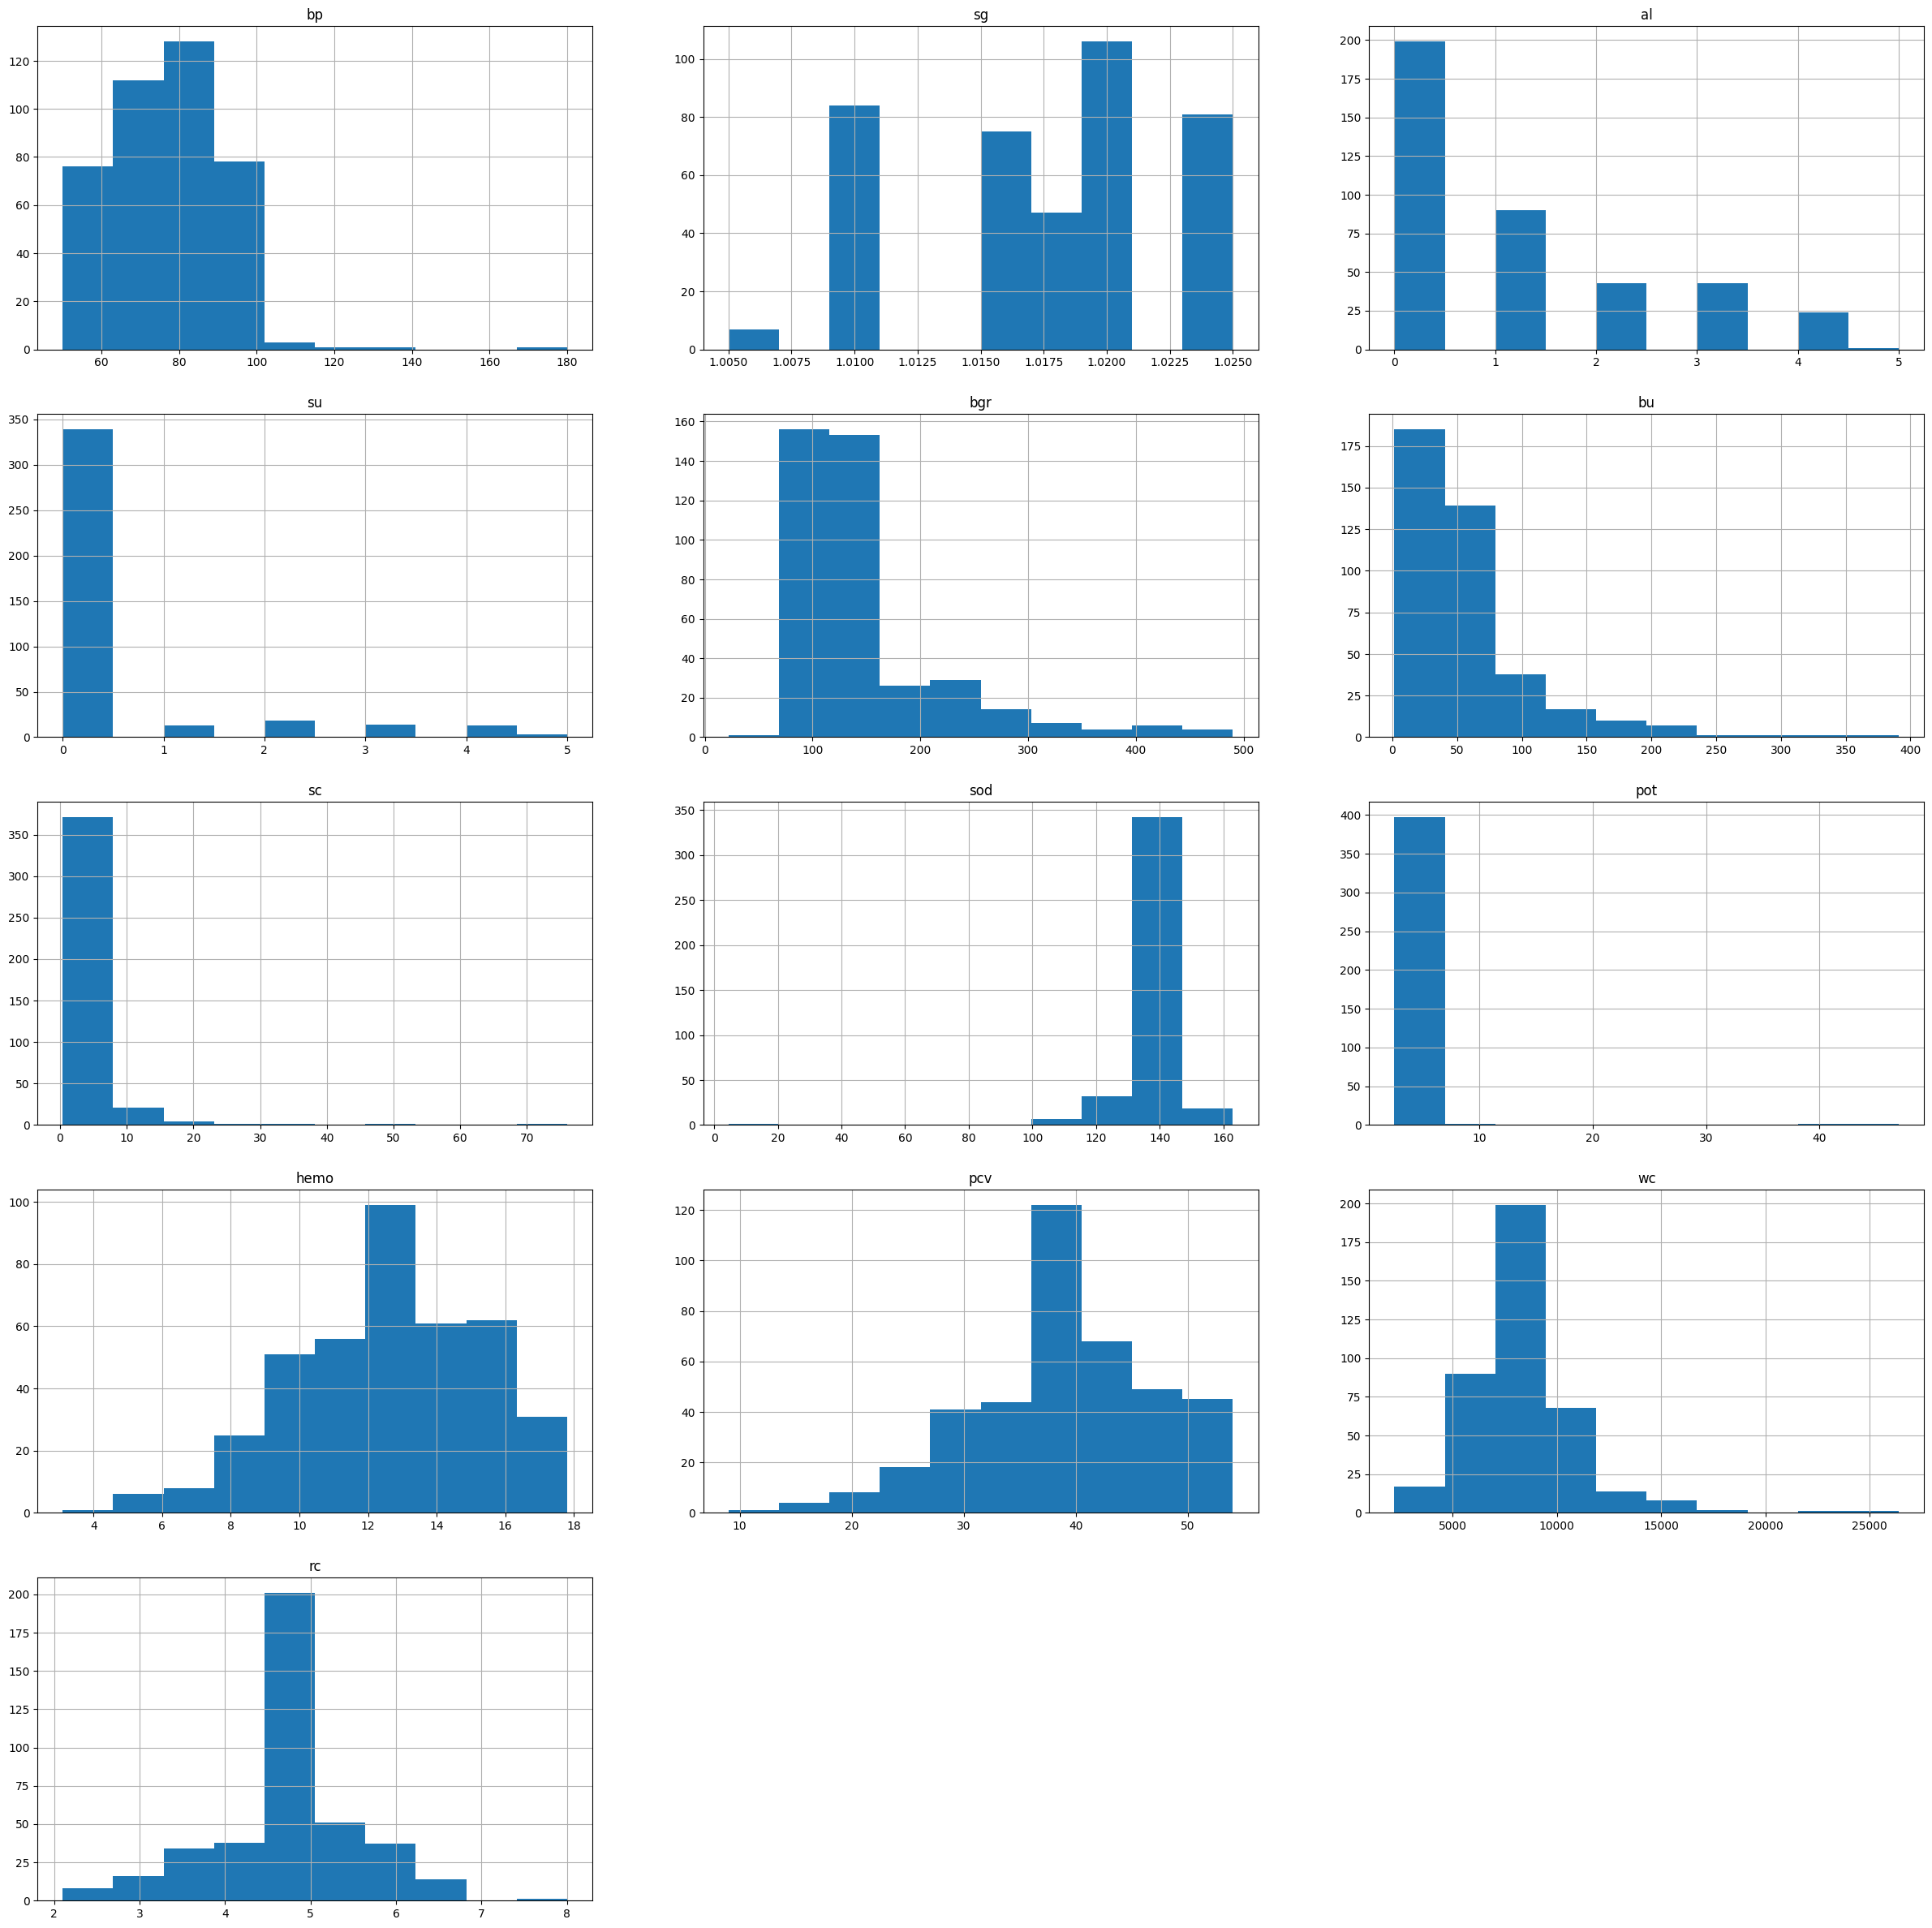

In [352]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)   # 5 rows and 3 columns
    ckd[feature].hist()
    plt.title(feature)

## Correlation between features

In [353]:
ckd.tail()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
399,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,18.0,...,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


In [354]:
ckd.groupby(['rbc','classification'])['rc'].agg(['count','mean','median','min','max'])

count      mean    median  min       max
rbc      classification                                          
abnormal ckd                47  4.241778  4.707435  2.5  5.600000
normal   ckd               201  4.349507  4.707435  2.1  8.000000
         ckd\t               2  3.603717  3.603717  2.5  4.707435
         notckd            150  5.347680  5.250000  4.4  6.500000

We can observe that when a person is not diseased its rbc count is 134, mean is also high whereas when he is diseased count drop downs to 25-40 and mean is low.

#### Relationship between haemoglobin and packed cell volume

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

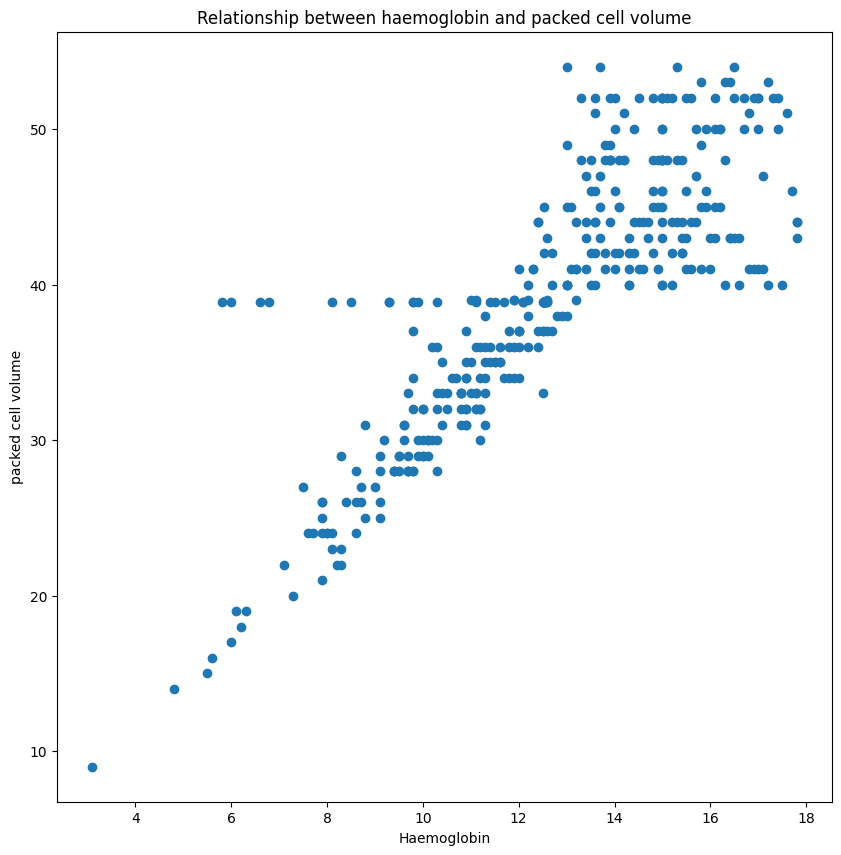

In [355]:
plt.figure(figsize=(10,10))
plt.scatter(x=ckd.hemo,y=ckd['pcv'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')


We can see that there is a linear relationship between haemoglobin and pacled cell volume

### Analyse distribution of red blood cell count chronic as well as non chronic

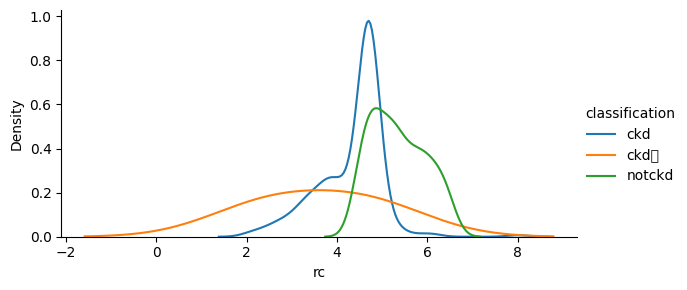

In [356]:
grid=sns.FacetGrid(ckd,hue='classification',aspect=2)
grid.map(sns.kdeplot,'rc')
grid.add_legend()

from above visuals we can say that person with lower rbc count have high chances of having chronic disease

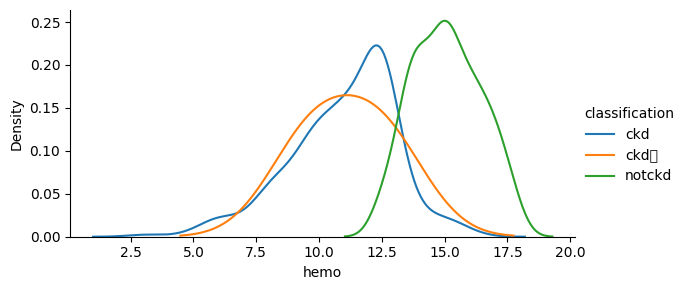

In [357]:
grid=sns.FacetGrid(ckd,hue='classification',aspect=2)
grid.map(sns.kdeplot,'hemo')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between red blood cell count and packed cell volume')

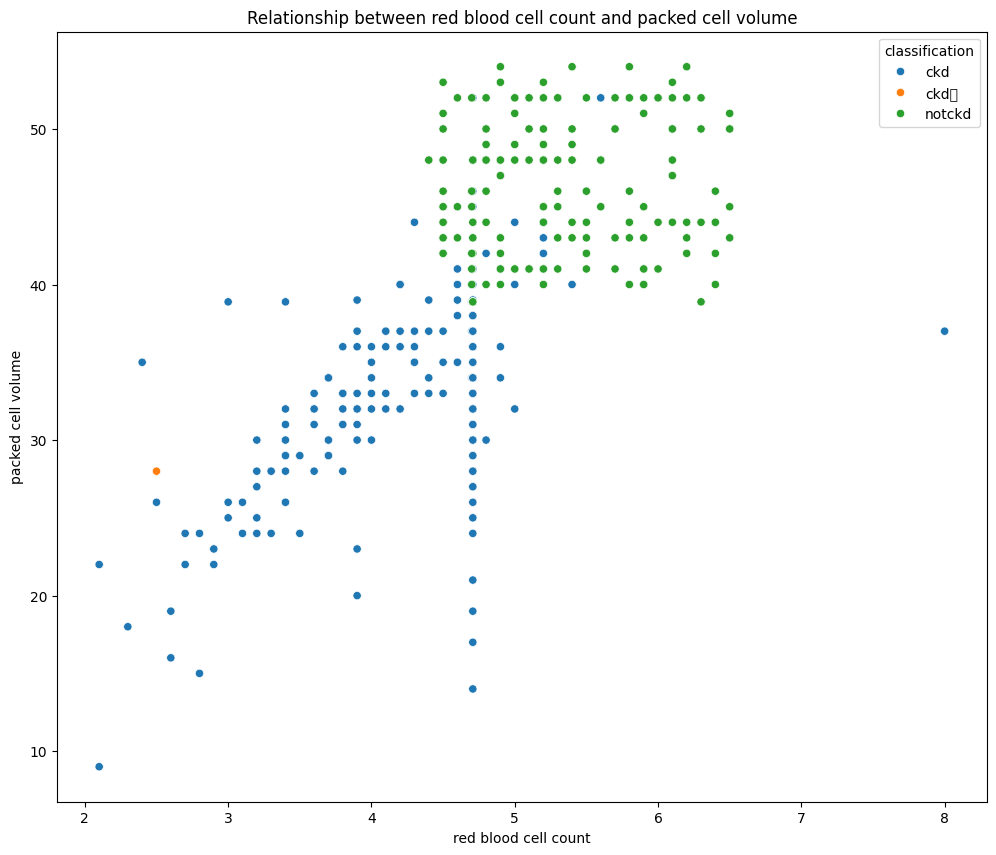

In [358]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=ckd['rc'],y=ckd['pcv'],hue=ckd['classification'])
plt.xlabel('red blood cell count')
plt.ylabel('packed cell volume')
plt.title('Relationship between red blood cell count and packed cell volume')


Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

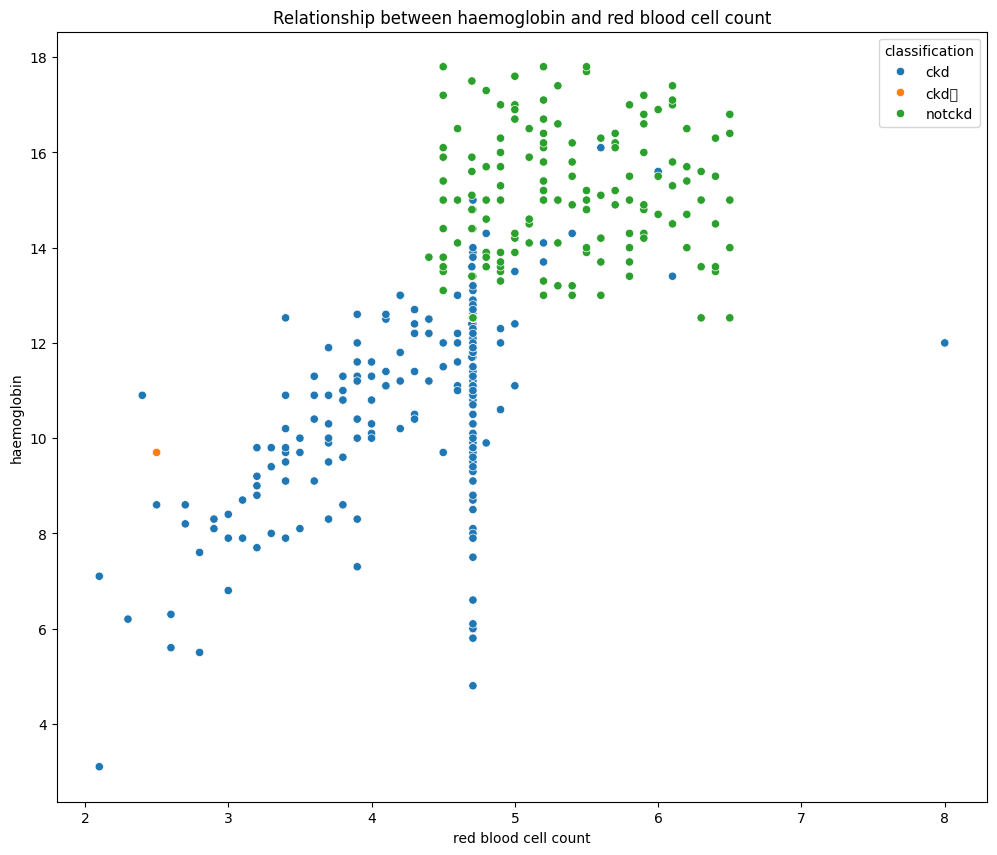

In [359]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=ckd['rc'],y=ckd['hemo'],hue=ckd['classification'])
plt.xlabel('red blood cell count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count')

* We can see that there is some kind of linearity in all the relationships
* Whenever haemoglobin is below 13-14 he is positive for chronic disease , Whenever haemoglobin is near 18 he is negative

## Handling Missing Values

We can fill this missing values with mean,median or std deviat

In [360]:
list(enumerate(cat_col))

[(0, 'rbc'),
 (1, 'pc'),
 (2, 'pcc'),
 (3, 'ba'),
 (4, 'htn'),
 (5, 'dm'),
 (6, 'cad'),
 (7, 'appet'),
 (8, 'pe'),
 (9, 'ane'),
 (10, 'classification')]

there are outliers in dataset so filling missing values with mean is not feasible , i will use median to fill missing values

In [361]:
for i in num_col:
    ckd[i].fillna(ckd[i].median(),inplace=True)

In [362]:
ckd.isnull().sum()

bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [363]:
ckd.describe()

,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,13.476298,0.005369,1.272318,1.029487,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314
min,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000
50%,78.234536,1.017408,1.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
75%,80.000000,1.020000,2.000000,0.450142,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000
max,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


## Filling missing values in categorical columns using random values

It was more important to find the missing values and need to clean thos emissing values by using different menthods. ( I've dropped the NULL Values ). Missing Values leads to False Output and sometimes cause many Problems while Evaluating our Model.

In [364]:
random_sample=ckd['rbc'].dropna().sample(152)

In [365]:
random_sample

275      normal
64       normal
171      normal
63     abnormal
310      normal
         ...   
393      normal
109      normal
196    abnormal
190    abnormal
263      normal
Name: rbc, Length: 152, dtype: object

In [366]:
ckd[ckd['rbc'].isnull()].index

Index([], dtype='int64')

In [367]:
random_sample.index

Index([275,  64, 171,  63, 310, 354, 124, 157, 215, 306,
       ...
       264, 119, 188, 175, 181, 393, 109, 196, 190, 263],
      dtype='int64', length=152)

We can see that indexes are different , while putting random values indexes must be equal

In [368]:
random_sample.index

Index([275,  64, 171,  63, 310, 354, 124, 157, 215, 306,
       ...
       264, 119, 188, 175, 181, 393, 109, 196, 190, 263],
      dtype='int64', length=152)

In [369]:
ckd.loc[ckd['rbc'].isnull(),'rbc']=random_sample

In [370]:
ckd.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,36.0,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,18.0,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,53.0,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,56.0,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,26.0,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [371]:
ckd['rbc'].isnull().sum()

0

<Axes: xlabel='count', ylabel='rbc'>

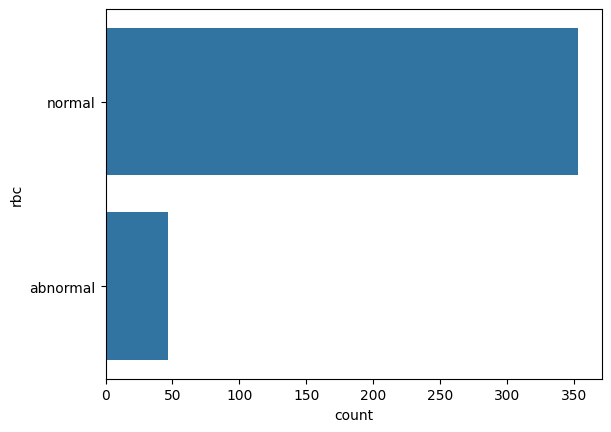

In [372]:
sns.countplot(ckd['rbc'])       # checking that ratio didn't change after filling missing values

ratio didnt changed

In [373]:
# #filling random values in all categorical columns
# def Random_value_Imputation(feature):
#     random_sample=ckd[feature].dropna().sample(ckd[feature].isnull().sum())
#     random_sample.index=ckd[ckd[feature].isnull()].index
#     ckd.loc[ckd[feature].isnull(),feature]=random_sample

In [374]:
ckd.isnull().sum()

bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

Those categorical variables who have less no. of missing values then we can replace it with mode

In [375]:
def impute_mode(feature):
    mode=ckd[feature].mode()[0]
    ckd[feature]=ckd[feature].fillna(mode)

In [376]:
for col in cat_col:
    impute_mode(col)

In [377]:
ckd[cat_col].isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [378]:
ckd.isnull().sum()

bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

We can see that there is no missing value now

## Performing the Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [379]:
for col in cat_col:
    print('{} has {} categories'.format(col,ckd[col].nunique()))

rbc has 2 categories
pc has 2 categories
pcc has 2 categories
ba has 2 categories
htn has 2 categories
dm has 5 categories
cad has 3 categories
appet has 2 categories
pe has 2 categories
ane has 2 categories
classification has 3 categories


## Label Encoding  ---> Because there are less no. of categories in each column

### LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder.

- normal -- 0
- abnormal --1

In [380]:
from sklearn.preprocessing import LabelEncoder

In [381]:
le=LabelEncoder()

In [382]:
for col in cat_col:
    ckd[col]=le.fit_transform(ckd[col])

In [383]:
ckd.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,...,44.0,7800.0,5.200000,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,...,38.0,6000.0,4.707435,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,...,31.0,7500.0,4.707435,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,...,32.0,6700.0,3.900000,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,...,35.0,7300.0,4.600000,0,3,1,0,0,0,0


## Selecting important features

- **SelectKBest**: Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. The classes in the sklearn.

- **chi2**: A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. The chi-square statistic compares the size any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship.



In [384]:
from sklearn.feature_selection import SelectKBest

In [385]:
from sklearn.feature_selection import chi2

In [386]:
ind_col=[col for col in ckd.columns if col!='classification']
dep_col='classification'

In [387]:
X=ckd[ind_col]
y=ckd[dep_col]

In [388]:
X.head()

,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,...,15.4,44.0,7800.0,5.200000,1,4,1,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,...,11.3,38.0,6000.0,4.707435,0,3,1,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,...,9.6,31.0,7500.0,4.707435,0,4,1,1,0,1
3,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,...,11.2,32.0,6700.0,3.900000,1,3,1,1,1,1
4,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,...,11.6,35.0,7300.0,4.600000,0,3,1,0,0,0


In [389]:
imp_features=SelectKBest(score_func=chi2,k=20)

In [390]:
imp_features=imp_features.fit(X,y)

In [391]:
imp_features

SelectKBest(k=20, score_func=<function chi2 at 0x00000209E9F91440>)

In [392]:
imp_features.scores_

array([8.24027108e+01, 5.52493333e-03, 2.28086956e+02, 1.02010508e+02,
       3.83541990e+00, 1.07919156e+01, 1.82164563e+01, 5.66583954e+00,
       2.42892549e+03, 2.36890483e+03, 3.56533136e+02, 2.87990524e+01,
       4.09466676e+00, 1.25104008e+02, 3.24700781e+02, 1.28220626e+04,
       2.11204833e+01, 8.40332684e+01, 6.34245929e+00, 1.16654279e+00,
       5.36412274e+01, 4.40233208e+01, 3.43636524e+01])

In [393]:
datascore=pd.DataFrame(imp_features.scores_,columns=['Score'])

In [394]:
datascore

,Score
0,82.402711
1,0.005525
2,228.086956
3,102.010508
4,3.835420
5,10.791916
6,18.216456
7,5.665840
8,2428.925494
9,2368.904828


In [395]:
X.columns

Index(['bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane'],
      dtype='object')

In [396]:
dfcols=pd.DataFrame(X.columns)

In [397]:
dfcols

,0
0,bp
1,sg
2,al
3,su
4,rbc
5,pc
6,pcc
7,ba
8,bgr
9,bu


In [398]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank

,0,Score
0,bp,82.402711
1,sg,0.005525
2,al,228.086956
3,su,102.010508
4,rbc,3.835420
5,pc,10.791916
6,pcc,18.216456
7,ba,5.665840
8,bgr,2428.925494
9,bu,2368.904828


In [399]:
features_rank.columns=['features','score']

In [400]:
features_rank

,features,score
0,bp,82.402711
1,sg,0.005525
2,al,228.086956
3,su,102.010508
4,rbc,3.835420
5,pc,10.791916
6,pcc,18.216456
7,ba,5.665840
8,bgr,2428.925494
9,bu,2368.904828


In [401]:
features_rank.nlargest(10,'score')

,features,score
15,wc,12822.062595
8,bgr,2428.925494
9,bu,2368.904828
10,sc,356.533136
14,pcv,324.700781
2,al,228.086956
13,hemo,125.104008
3,su,102.010508
17,htn,84.033268
0,bp,82.402711


In [402]:
selected=features_rank.nlargest(10,'score')['features'].values

In [403]:
selected

array(['wc', 'bgr', 'bu', 'sc', 'pcv', 'al', 'hemo', 'su', 'htn', 'bp'],
      dtype=object)

In [404]:
X_new=ckd[selected]

In [405]:
X_new.head()

,wc,bgr,bu,sc,pcv,al,hemo,su,htn,bp
0,7800.0,121.000000,36.0,1.2,44.0,1.0,15.4,0.0,1,80.0
1,6000.0,148.036517,18.0,0.8,38.0,4.0,11.3,0.0,0,50.0
2,7500.0,423.000000,53.0,1.8,31.0,2.0,9.6,3.0,0,80.0
3,6700.0,117.000000,56.0,3.8,32.0,4.0,11.2,0.0,1,70.0
4,7300.0,106.000000,26.0,1.4,35.0,2.0,11.6,0.0,0,80.0


In [406]:
len(X_new)

400

In [407]:
X_new.shape

(400, 10)

In [408]:
from sklearn.model_selection import train_test_split

In [409]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,test_size=0.3)

In [410]:
X_train.shape

(280, 10)

In [411]:
y_train.value_counts()    #Checking for imbalancing

classification
0    177
2    102
1      1
Name: count, dtype: int64

In [412]:
from sklearn.ensemble import RandomForestClassifier

In [413]:
model = RandomForestClassifier(n_estimators = 20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

# Let's Predict our model Accuracy.

In [414]:
y_pred=model.predict(X_test)

In [415]:
y_pred

array([0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Evaluation of the model

In [416]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [417]:
confusion_matrix(y_test,y_pred)

array([[69,  0,  2],
       [ 1,  0,  0],
       [ 4,  0, 44]], dtype=int64)

In [418]:
accuracy=accuracy_score(y_test,y_pred)*100
print(accuracy,"%")

94.16666666666667 %


As we Performed all the Methods and Trained our Model using different Menthods

# We Got Very Good Accuracy Using Random Forest Classifier - 94.17% (Approx.) Accuracy

# Save the trained model pickel file

In [419]:
import pickle
pickle.dump(model, open('ckd_model.pkl', 'wb'))